# User guide for plotting Conformal Prediction metrics


In [1]:
#import sys
#!{sys.executable} -m pip install numpy pandas seaborn

In [2]:
# Make sure to add the code to your PYTHONPATH
import sys
sys.path.append('src')
from pharmbio.cp import metrics, plotting

# So we can do customizations 
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

Using Seaborn plotting defaults


Import the results from a Conformal predictor. 

In [3]:
# Binary test-case
my_data = np.genfromtxt('test/resources/transporters.p-values.csv', delimiter=';', skip_header=1)
true_labels = np.array([1 if x == 1.0 else 0 for x in my_data[:,1]])
p_values=my_data[:,[2,3]]

In [4]:
# Multiclass test-case
from sklearn.datasets import load_iris
multiclass_target_names = load_iris().target_names
multiclass_data = np.genfromtxt('test/resources/multiclass.csv', delimiter=',')

multiclass_p_values = multiclass_data[:,1:]
multiclass_true_labels = multiclass_data[:,:1].astype(np.int)

## Compute metrics

In [5]:
metrics.calc_error_rate(true_labels, p_values, sign=0.25)

(0.18454935622317598, array([0.24      , 0.12037037]))

In [6]:
metrics.calc_error_rate(multiclass_true_labels, multiclass_p_values, sign=0.15)

(0.1, array([0.    , 0.3125, 0.    ]))

In [7]:
metrics.calc_OF(true_labels, p_values)

0.1360179639484979

In [8]:
CM = metrics.calc_confusion_matrix(true_labels, p_values, significance=0.2, class_labels=[-1,1])
CM

,-1,1
-1,80,9
1,25,94
Empty,0,0
Both,20,5


In [9]:
CM_multiclass = metrics.calc_confusion_matrix(multiclass_true_labels, multiclass_p_values, significance=0.02, class_labels=multiclass_target_names)
CM_multiclass

,setosa,versicolor,virginica
setosa,19,0,0
versicolor,0,13,0
virginica,0,2,15
Empty,0,0,0
Correct Multi-set,0,1,0
Incorrect Multi-set,0,0,0


## Plotting calibration curves

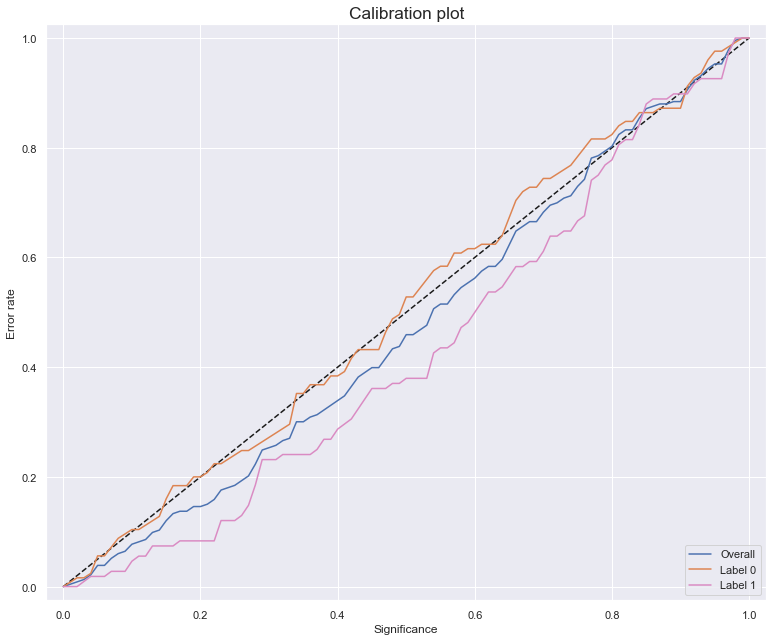

In [10]:
the_fig = plotting.plot_calibration_curve(true_labels, p_values, title='Calibration plot')

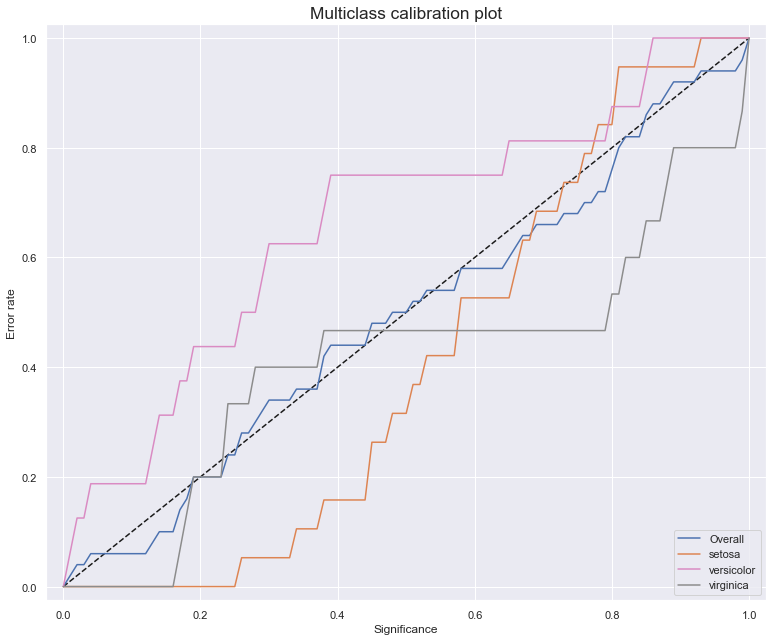

In [11]:
mutliclass_fig = plotting.plot_calibration_curve(multiclass_true_labels, multiclass_p_values, title='Multiclass calibration plot', class_labels=multiclass_target_names)

Plotting can also be done in a smaller range of significance values and has a few parameters to tweak the generated figure

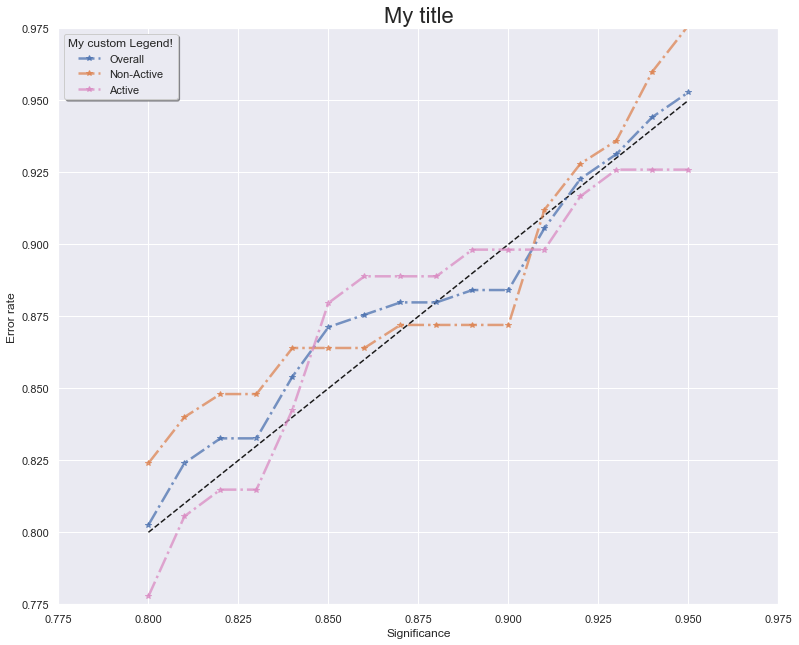

In [12]:
line_args = {'alpha': 0.75, 'marker':"*", 'linestyle': '-.', 'linewidth':2.5}

the_fig = plotting.plot_calibration_curve(true_labels, p_values, significance_min=0.8, significance_max=.95, fig_padding=0.025,class_labels=["Non-Active", "Active"], **line_args)

# Get the axes to make custumizations on
axes = the_fig.axes[0]

# Set a custom title
axes.set_title('My title', fontsize=22)

 

# Add a new (custom) legend
axes.legend(shadow=True,title='My custom Legend!')

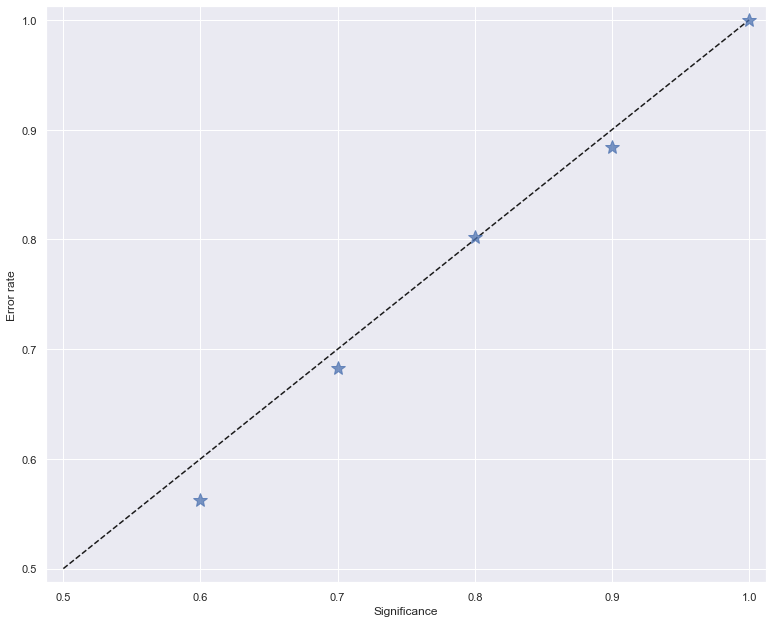

In [13]:
line_args = {'alpha': 0.75, 'marker':"*", 'ms': 15,'linestyle': 'None', 'linewidth':2.5}

the_fig = plotting.plot_calibration_curve(true_labels, p_values, significance_min=0.5, significance_max=1, significance_step=0.1, class_labels=["Non-Active", "Active"],plot_all_labels=False, **line_args)

Clibration plot for a single class, note that we will get a warning from the underlying metric that computes the error-rate for each class

src/pharmbio/cp/metrics.py:66: RuntimeWarning: invalid value encountered in true_divide
  label_wise_erro_rate = np.array(label_wise_errors) / np.array(label_wise_counts)


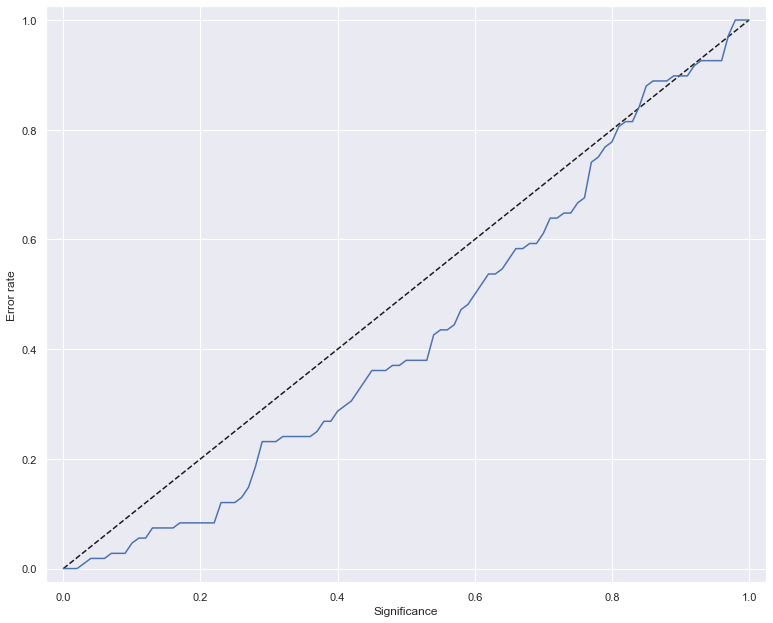

In [14]:
only_class_1 = (true_labels == 1)
true_1 = true_labels[only_class_1]
p_val_1 = p_values[only_class_1]
the_fig = plotting.plot_calibration_curve(true_1, p_val_1, plot_all_labels=False)

## Plotting p-values against each other

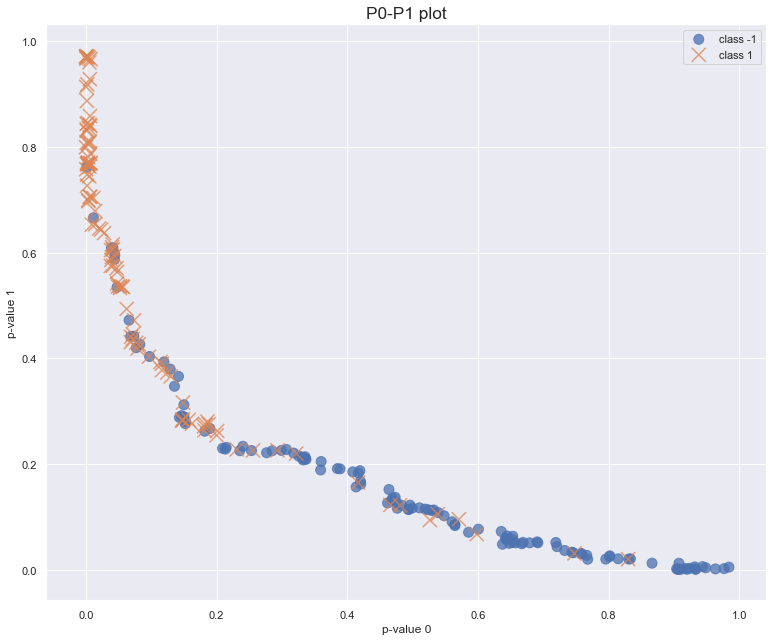

In [15]:
kwargs = {'alpha': 0.75} #, 'linewidth': 10} #, 'fontsize': 30}
font_args = None #{'fontsize':30}
marks = ['o','x']
s = [100, 200]
p0p1 = plotting.plot_pvalues(true_labels, p_values, title='P0-P1 plot',sizes=s, markers=marks, labels=['class -1', 'class 1'],fontargs=font_args,**kwargs)


## Plotting distribution of prediction sets

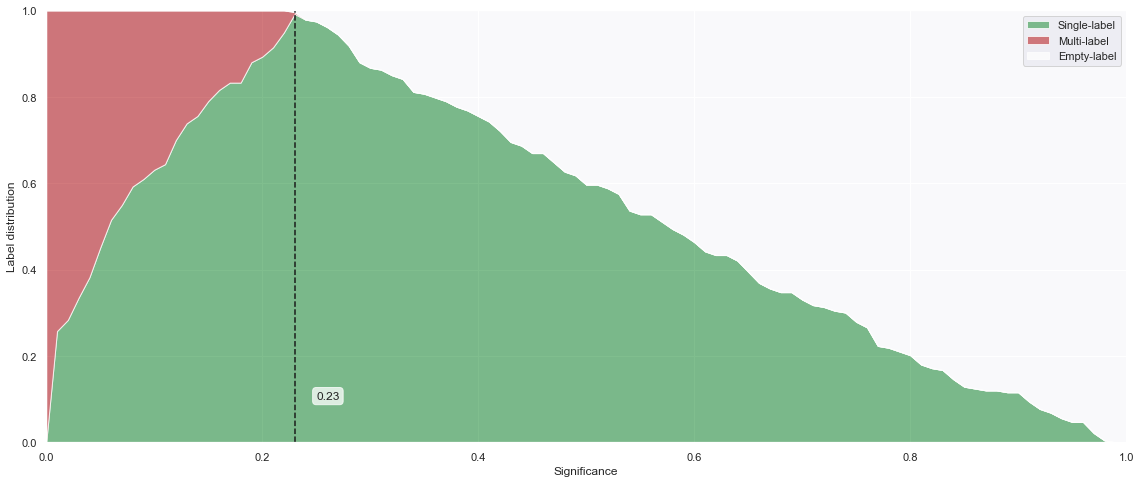

In [16]:
my_fig = plt.figure(figsize=(15,6))
ax = my_fig.add_axes([0,0,1,1])
custom_args = {'alpha': 0.75}
fig = plotting.plot_label_distribution(true_labels, p_values, ax=ax, **custom_args)
# my_fig.savefig('area-plot.png',bbox_inches='tight')

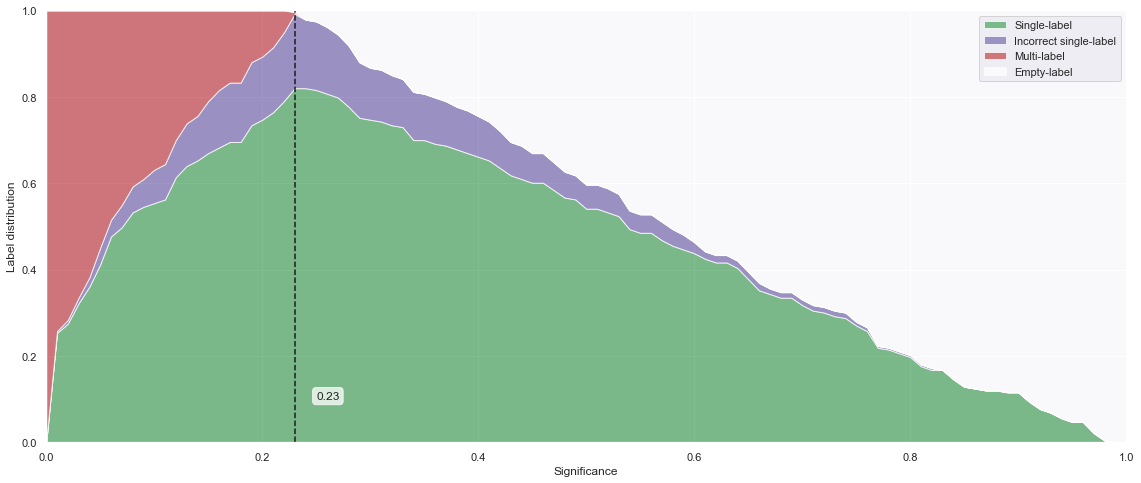

In [17]:
fig = plotting.plot_label_distribution(true_labels, p_values, fig_size=(15,6),display_incorrects=True, **custom_args)

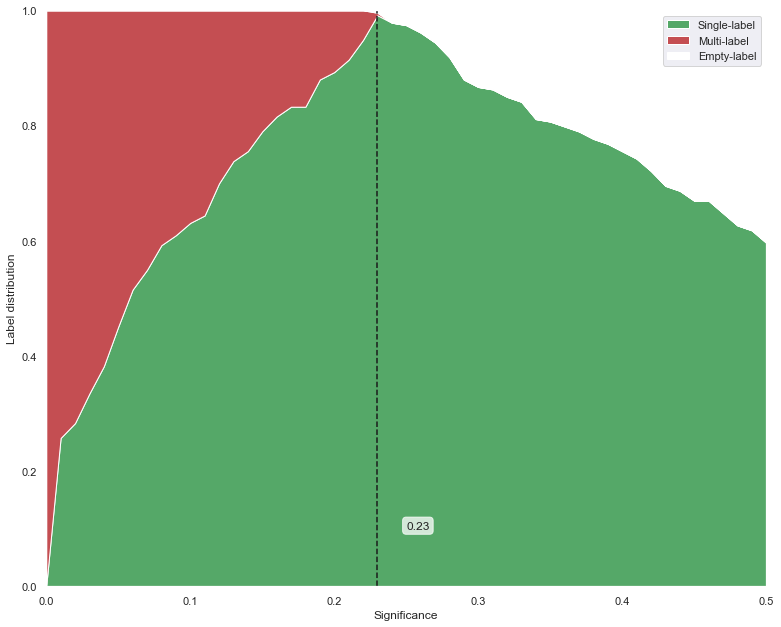

In [18]:
fig = plotting.plot_label_distribution(true_labels, p_values, significance_max=.5)

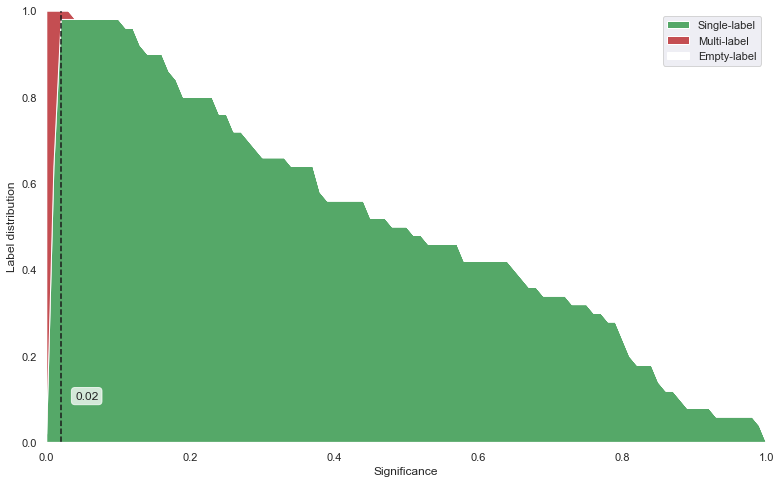

In [19]:
fig_multiclass = plotting.plot_label_distribution(multiclass_true_labels, multiclass_p_values, fig_size=(10,6))

## Plotting predictions using Bubble plots

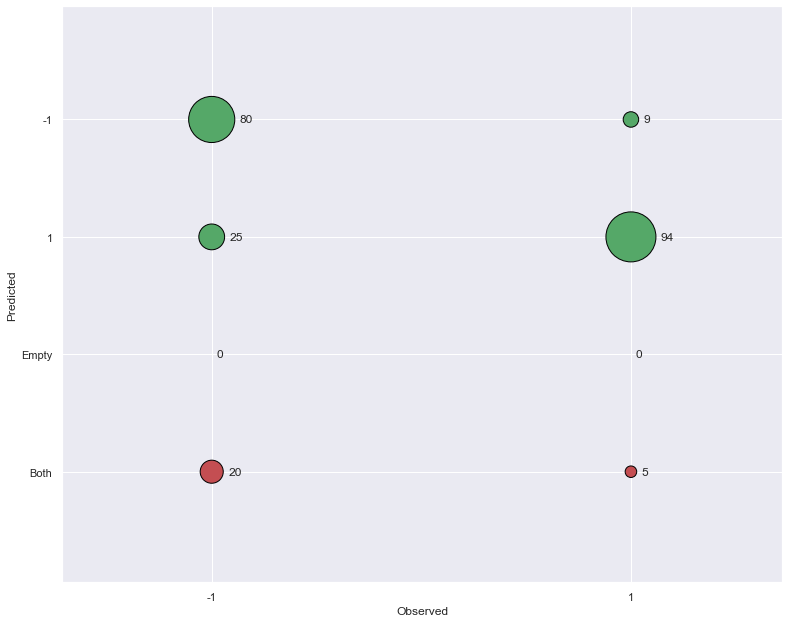

In [20]:
# We can use the confusion matrix computed earlier
bubble_plot = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM)

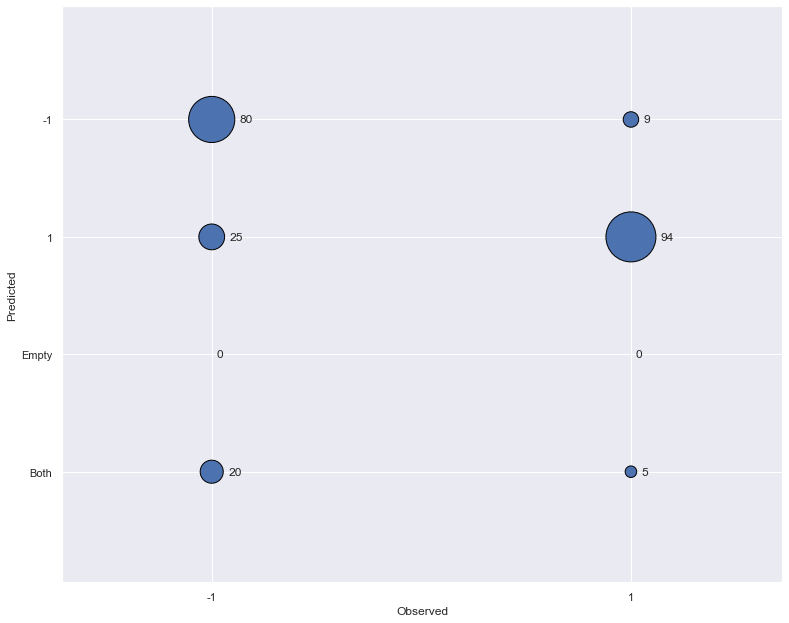

In [21]:
bubble_plot_none = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM, color_scheme=None)

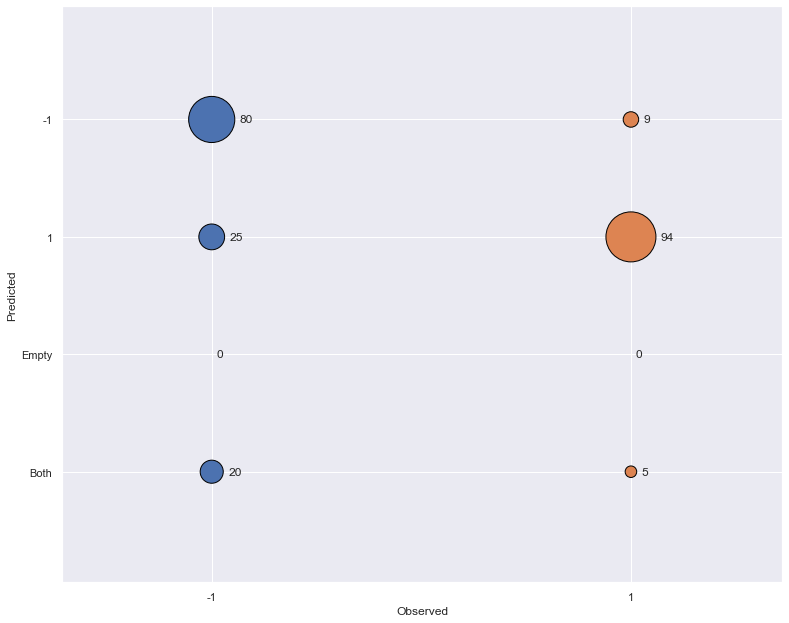

In [22]:
bubble_plot_label = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM, color_scheme='label')

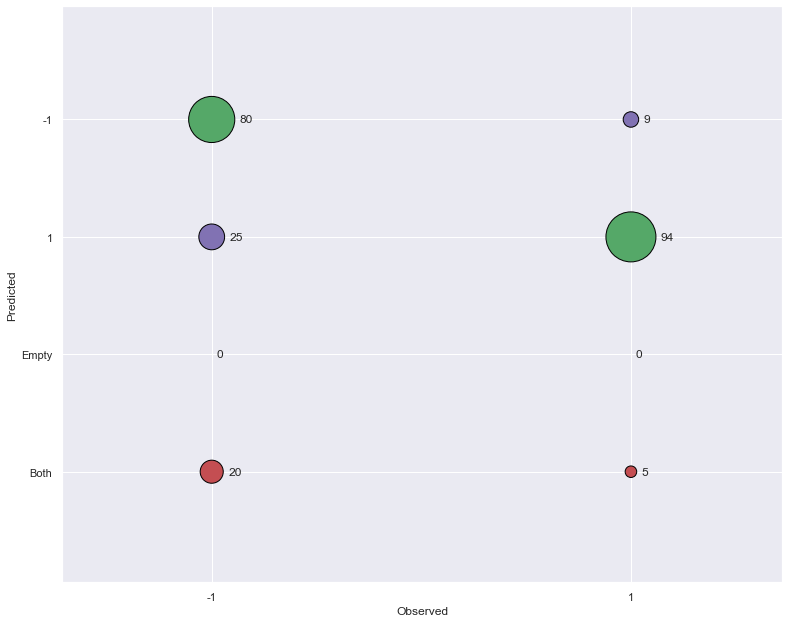

In [23]:
bubble_plot_label = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM, color_scheme='full')

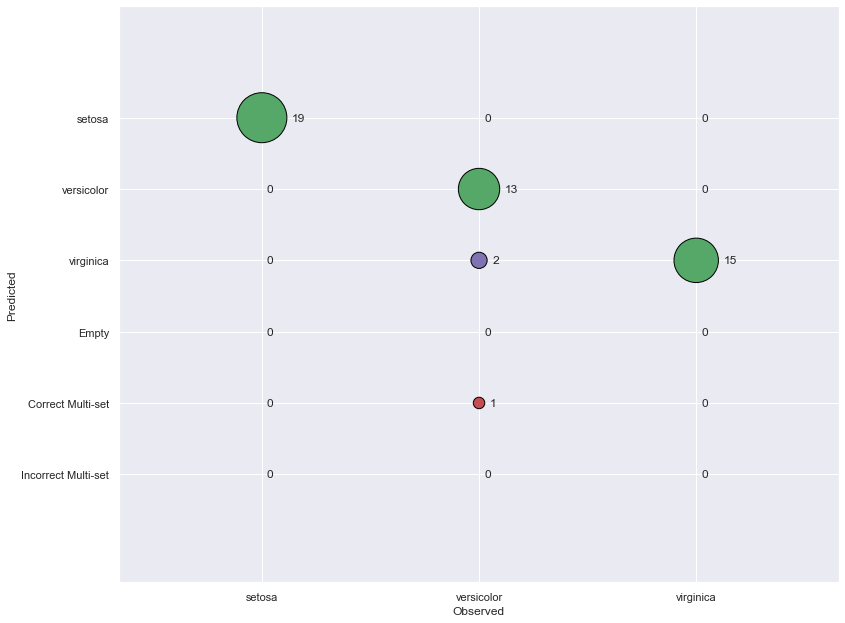

In [24]:
bubble_plot_label_multi = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM_multiclass, color_scheme='full')

Text(0.5, 1.0, 'Bubble plot')

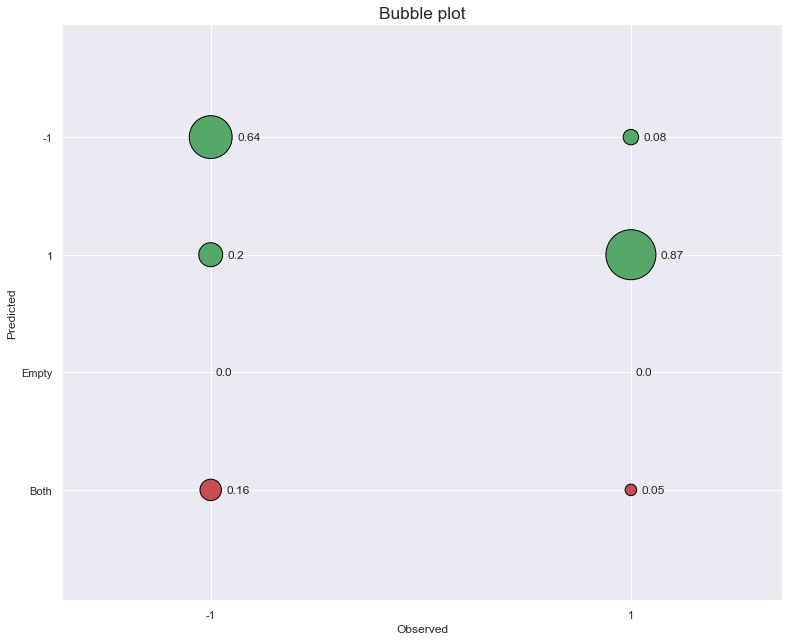

In [25]:
# Compute a normalized confusion matrix where each column sums to 1
CM_norm = metrics.calc_confusion_matrix(true_labels, p_values, significance=0.2, class_labels=[-1,1], normalize_per_class=True)
bubble_plot_norm = plotting.plot_confusion_matrix_bubbles(confusion_matrix=CM_norm)
plt.title('Bubble plot', fontdict={'fontsize': 'x-large'})

## Plotting heatmaps of a confusion matrix

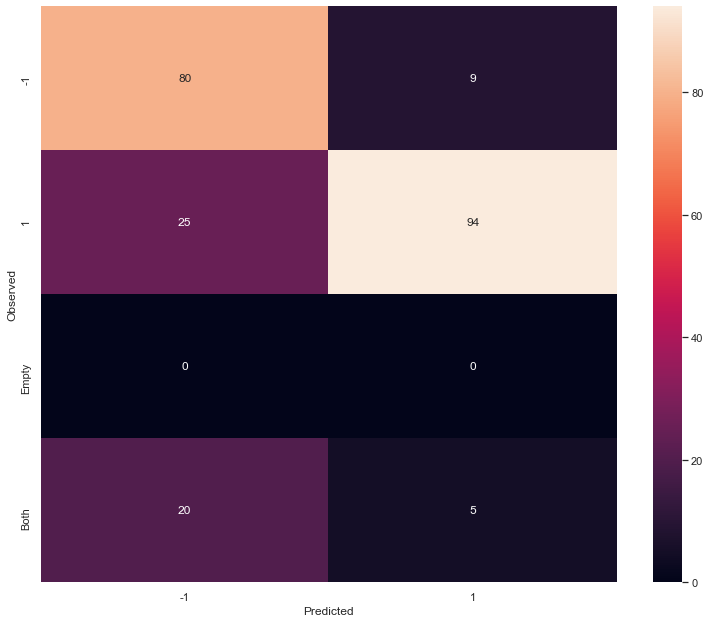

In [26]:
heat_m = plotting.plot_heatmap(CM)

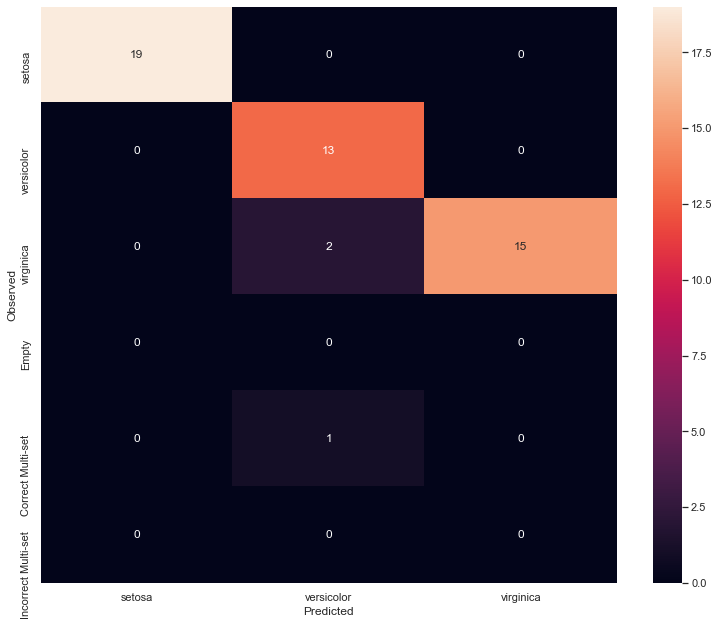

In [27]:
heat_m_multi = plotting.plot_heatmap(CM_multiclass)

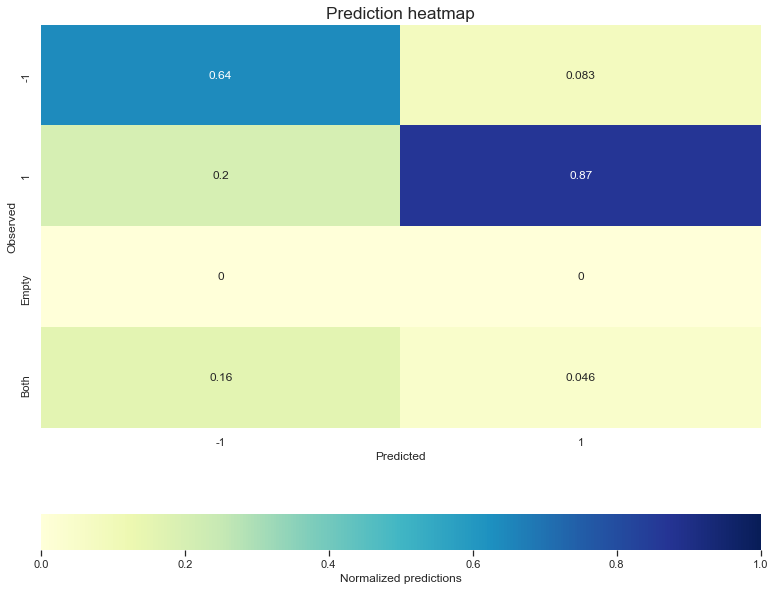

In [28]:
extra_args = {'vmax': 1,'cmap':"YlGnBu"} 
cbar_kws = {"orientation": "horizontal", 'label': 'Normalized predictions'}
heat_m_norm = plotting.plot_heatmap(CM_norm, title="Prediction heatmap", cbar_kws=cbar_kws,**extra_args)

## Example of joining mutliple plots in a grid

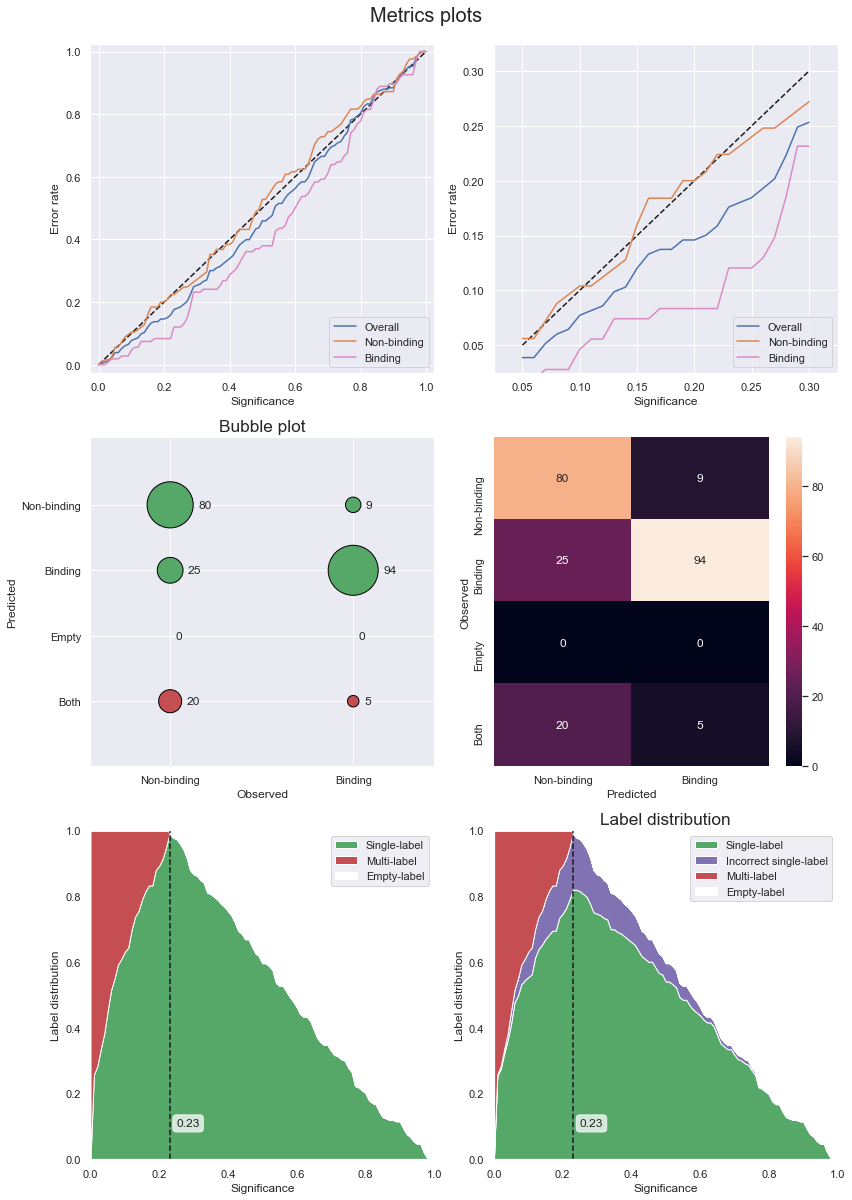

In [29]:
fig, axes = plt.subplots(3,2, figsize=(12,17))
#fig.subplots_adjust(top=0.8)
class_labels=['Non-binding','Binding']
# Calibration plot
plotting.plot_calibration_curve(true_labels, p_values, ax=axes[0,0], class_labels=class_labels)
#70-95% confidence only
plotting.plot_calibration_curve(true_labels, p_values, ax=axes[0,1], significance_max=.3, significance_min=0.05, fig_padding=.025, class_labels=class_labels) 
plotting.plot_confusion_matrix_bubbles(metrics.calc_confusion_matrix(true_labels,p_values, .2, class_labels=class_labels),title="Bubble plot", ax=axes[1,0])
plotting.plot_heatmap(metrics.calc_confusion_matrix(true_labels,p_values, .2, class_labels=class_labels), ax=axes[1,1])
plotting.plot_label_distribution(true_labels,p_values, ax=axes[2,0])
plotting.plot_label_distribution(true_labels,p_values, ax=axes[2,1], display_incorrects=True, title='Label distribution')
fig.suptitle('Metrics plots', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.96])
#fig.savefig('multi-plot.png',dpi=300, bbox_inches='tight')